In [194]:
# Loading data, Creating first model

import scipy.io
from keras.models import Sequential
from keras.layers import Dense

data = scipy.io.loadmat('data.mat')
train_X = data['X']
train_y = data['y']
test_X = data['Xval']
test_y = data['yval']

model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=20, batch_size=99, verbose=0)

results = model.evaluate(test_X, test_y)
acc_result = results[1]*100
acc_result = round(acc_result, 2)
print("Accuracy: ", acc_result)


7/7 [==============================] - 0s 958us/step - loss: 0.3577 - accuracy: 0.8750
Accuracy:  87.5


In [193]:
# Implement L2 regularization and tuning hyper parameters in model

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=regularizers.l2(l2=0.001)))
model1.add(Dense(16, activation='tanh'))
model1.add(Dense(8, activation='tanh'))
model1.add(Dense(1, activation='sigmoid', activity_regularizer=regularizers.l2(0.001)))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(train_X, train_y, epochs=30, batch_size=66, verbose=0)

results1 = model1.evaluate(test_X, test_y)
acc_result1 = results1[1]*100
acc_result1 = round(acc_result1, 2)
print("Accuracy: ", acc_result1)


7/7 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9200
Accuracy:  92.0


In [202]:
# Implement Dropout regularization and tuning hyper parameters in model

from keras.models import Sequential
from keras.layers import Dense, Dropout

model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(2,)))
model2.add(Dropout(0.50))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(8, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(train_X, train_y, epochs=45, batch_size=33, verbose=0)

results2 = model2.evaluate(test_X, test_y)
acc_result2 = results2[1]*100
acc_result2 = round(acc_result2, 2)
print("Accuracy: ", acc_result2)


7/7 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9350
Accuracy:  93.5


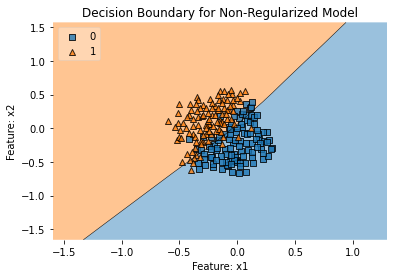

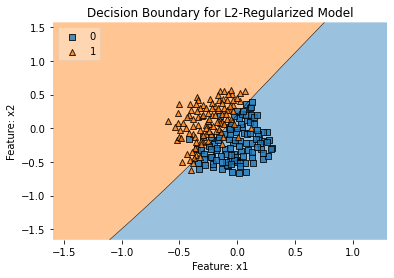

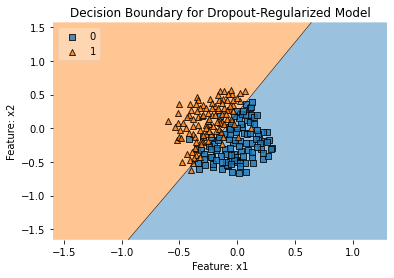

In [205]:
# Plot Decision Boundaries

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_decision_boundary(xlabel_name, ylabel_name, title_name, model_name):
    # Taking training dataset
    train_y_flat = train_y.flatten()
    plot_decision_regions(train_X, train_y_flat, clf=model_name, legend=2)
    plt.title(title_name)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.show()

x_label_name = 'Feature: x1'
y_label_name = 'Feature: x2'

# Decision Boundary for non-regularized model
non_reg_title = 'Decision Boundary for Non-Regularized Model'
plot_decision_boundary(x_label_name, y_label_name, non_reg_title, model)

# Decision Boundary for L2-regularized model
l2_reg_title = 'Decision Boundary for L2-Regularized Model'
plot_decision_boundary(x_label_name, y_label_name, l2_reg_title, model1)

# Decision Boundary for Dropout-regularized model
dropout_reg_title = 'Decision Boundary for Dropout-Regularized Model'
plot_decision_boundary(x_label_name, y_label_name, dropout_reg_title, model2)

From the above 3 plots, it can be inferred that after applying regularization, the accuracy of the model has increased.
On comparing the plots, the decision boundary is curving for non-regularized model. Whereas for L2 and Dropout, the boundary line is straight.